# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [617]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")

north_df.head(5)
south_df.head(5)

north_df.info()
south_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [618]:
# EDA Question 1A solution below:
north_rep_count = north_df["Rep ID"].nunique()
print(f"The North branch rep count is", north_rep_count)


The North branch rep count is 9


#### EDA Question 1B:  How many reps are in the South branch?  

In [619]:
# EDA Question 1B solution Below:
south_rep_count = south_df["Rep ID"].nunique()
print(f"The South branch rep count is", south_rep_count)


The South branch rep count is 11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [620]:
# EDA Question 2A solution Below:
north_avg_busy_min = north_df["Busy Minutes"].mean().round(2)
print(f"The average North branch Busy Minutes are", north_avg_busy_min, "minutes.")

north_avg_not_ready_min = north_df["Not Ready Minutes"].mean().round(2)
print(f"The average North branch Not Ready Minues are", north_avg_not_ready_min, "minutes.")

north_avg_incoming_wait = north_df["Incoming Wait Time"].mean().round(2)
print(f"The average North branch Incoming Wait Times are", north_avg_incoming_wait, "seconds.")

north_avg_during_call_wait = north_df["During Call Wait Time"].mean().round(2)
print(f"The average North branch During Call Wait Times are", north_avg_during_call_wait, "minutes.")

The average North branch Busy Minutes are 9.99 minutes.
The average North branch Not Ready Minues are 1.91 minutes.
The average North branch Incoming Wait Times are 3.05 seconds.
The average North branch During Call Wait Times are 2.97 minutes.


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [621]:
# EDA Question 2B solution Below:
south_avg_busy_min = south_df["Busy Minutes"].mean().round(2)
print(f"The average South branch Busy Minutes are", south_avg_busy_min, "minutes.")

south_avg_not_ready_min = south_df["Not Ready Minutes"].mean().round(2)
print(f"The average South branch Not Ready Minues are", south_avg_not_ready_min, "minutes.")

south_avg_incoming_wait = south_df["Incoming Wait Time"].mean().round(2)
print(f"The average South branch Incoming Wait Times are", south_avg_incoming_wait, "seconds.")

south_avg_during_call_wait = south_df["During Call Wait Time"].mean().round(2)
print(f"The average South branch During Call Wait Times are", south_avg_during_call_wait, "minutes.")

The average South branch Busy Minutes are 10.05 minutes.
The average South branch Not Ready Minues are 1.91 minutes.
The average South branch Incoming Wait Times are 3.0 seconds.
The average South branch During Call Wait Times are 3.08 minutes.


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [622]:
# EDA Question 3 solution Below:
north_south_df = pd.concat([north_df, south_df]).groupby("Time Block", as_index= True)
calls_by_time = north_south_df["Calls"].sum()
print(calls_by_time)



Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [623]:
# Question 1 solution below
# North dataframe check for null values with a total of any null values.
north_df.isna().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [624]:
# Question 1 cont..
# South dataframe check for null values with a total of any nulls. 
south_df.isna().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

#### Record your answer below:

> Your Answer: Yes, there are missing values in both the North and South dataframes in the 'Incoming Wait Time' column. I did not remove or replace these values
because these were for the "Outgoing" calls, I did not want to skew the Incoming Wait Time average by replacing them with 0s.

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [625]:
# Cleaning Question 2 solution below:
# Check to see what is the issue with the secon YES value.
north_df['Sale'].value_counts().unique

<bound method Series.unique of Sale
NO      234
YES      10
YES       1
Name: count, dtype: int64>

In [ ]:
#Question 2 cont..
north_df["Sale"] = north_df['Sale'].str.strip()
# Used .str.strip() to remove whitespace
north_df['Sale'].value_counts().unique
# Ran a second value_counts and unique to ensure the second YES value was removed and added to the total of YES values.


<bound method Series.unique of Sale
NO     234
YES     11
Name: count, dtype: int64>

##### Record your answer by below:
> Your Answer: First I ran a value_counts and unique so I could see what might be the issue with the double YES value. After taking a look, I 
updated the Sale column in the North dataframe by stripping any whitespace from all the values. This fixed the issue and now there are only NO and YES as 
the unique values for the Sale column

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [627]:
# Cleaning Question 3 solution below:
# Duplicate check in North data frame
duplicates_north = north_df.duplicated().sum()
print(duplicates_north)

0


In [628]:
# Question 3 cont..
# Duplicate check in South data frame
duplicates_south = south_df.duplicated().sum()
print(duplicates_south)

0


##### Record your answer below:
> Your Answer: There are no duplicates in either dataset. I used .duplicated to return either FALSE for not duplicated or TRUE for yes this is a duplicated row.
To make this a concise check, I added .sum to give me a total of TRUE values found. There were 0 to remove so I stopped my search there. Had there been any duplicate rows, I would have used .drop_duplicates and I would have saved the dataframe with these duplicate rows removed.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [629]:
# Cleaning Question 4 solution below:
# First I am checking some of the content of each column in the North dataset.
north_df.head(5)

# We are not researching anything about is a sale was made so 'Sale' is unnecessary.
north_df = north_df.drop('Sale', axis=1)
north_df.head(5)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,0,0,8,2,1.0,4,1


In [630]:
# Cleaning Question 4 solution cont.
# First I am checking some of the content of each column in the South dataset.
south_df.head(5)

# We are not researching anything about is a sale was made so 'Sale' is unnecessary.
south_df = south_df.drop('Sale', axis=1)
south_df.head(5)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,0,0,8,3,1.0,3,1


##### Record your answer below:
> Your Answer: I found the 'Sale' column to be unnecessary. We are only researching call efficiency so if a sale was made is not needed for our purposes.
 To remove this column in both the North and South datasets, I used .drop, listed 'Sale' as the column to drop, and specified axis=1 to specify that I was dropping a column.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [631]:
# Create dataframe for the entire company named df
df = pd.concat([north_df, south_df], axis=0)
df
# Concat to combine both data tables since all columns were identical in both dataframes.

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [632]:
# Manipulation Question solution below:
# North dataframe grouped to determiine rep with highest call number.
north_grouped = north_df.groupby("Rep ID")["Calls"].sum()
sorted_north_grouped = north_grouped.sort_values(ascending=False)
sorted_north_grouped

Rep ID
Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Xander    24
Cam       24
Amanda    23
Andy      23
Name: Calls, dtype: int64

In [633]:
#Question 1 cont..
# South dataframe grouped to determiine rep with highest call number.
south_grouped = south_df.groupby("Rep ID")["Calls"].sum()
sorted_south_grouped = south_grouped.sort_values(ascending=False)
sorted_south_grouped

Rep ID
Eric      35
Randy     33
Sandy     32
Helga     31
George    29
Kate      29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: Calls, dtype: int64

##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent
- South Branch = Eric

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [634]:
# Manipulation Question 2 solution below:
#North Call Center Abandonment Rate
north_abandon_rate = (north_df['Abandoned'].sum())/(north_df['Calls'].sum()) * 100
print(f"The north call center abandonment rate is:", north_abandon_rate.round(2),"%.")

The north call center abandonment rate is: 2.86 %.


In [635]:
#Question 2 cont...
#South Call Center Abandonment Rate
south_abandon_rate = (south_df['Abandoned'].sum())/(south_df['Calls'].sum()) * 100
print(f"The south call center abandonment rate is:", south_abandon_rate.round(2),"%.")

The south call center abandonment rate is: 1.27 %.


In [636]:
#Question 2 cont...
#Company Wide Abandonment Rate
company_abandon_rate = (df['Abandoned'].sum())/(df['Calls'].sum()) * 100
print(f"The Company Wide abandonment rate is:", company_abandon_rate.round(2),"%.")

The Company Wide abandonment rate is: 1.97 %.


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? Yes, both the South Branch and the Company Wide Abandonment Rate fell below 2%.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [637]:
# Manipulation Question 3 solution below:
# North Call Center. First filter the Incoming Wait Time column for values that are <= 2 seconds, and drop all Null values.
ideal_service_level_north = north_df[north_df["Incoming Wait Time"] <= 2].dropna()

#Counting total calls answered within 2 seconds and the total incoming wait time calls
count_ideal_north = len(ideal_service_level_north)
count_ideal_north
count_incoming_north = len(north_df["Incoming Wait Time"].dropna())
count_incoming_north

#Calculating Call Center Efficiency
north_service_efficiency = (count_ideal_north/count_incoming_north) * 100
print(f"North Call Center efficiency is:", north_service_efficiency, "%.")



North Call Center efficiency is: 40.243902439024396 %.


In [638]:
# Manipulation Question 3 solution below:
# South Call Center. First filter the Incoming Wait Time column for values that are <= 2 seconds, and drop all Null values.
ideal_service_level_south = south_df[south_df["Incoming Wait Time"] <= 2].dropna()

#Counting total calls answer within 2 seconds and the total incoming wait time calls
count_ideal_south = len(ideal_service_level_south)
count_ideal_south
count_incoming_south = len(south_df["Incoming Wait Time"].dropna())
count_incoming_south

#Calculating Call Center Efficiency
south_service_efficiency = (count_ideal_south/count_incoming_south) * 100
print(f"South Call Center efficiency is:", south_service_efficiency, "%.")

South Call Center efficiency is: 38.095238095238095 %.


In [639]:
# Manipulation Question 3 solution below:
# Company Wide Call Center. First filter the Incoming Wait Time column for values that are <= 2 seconds, and drop all Null values.
ideal_service_level_cw = df[df["Incoming Wait Time"] <= 2].dropna()

#Counting total calls answer within 2 seconds and the total incoming wait time calls
count_ideal_cw = len(ideal_service_level_cw)
count_ideal_cw
count_incoming_cw = len(df["Incoming Wait Time"].dropna())
count_incoming_cw
#Calculating Call Ceneter Efficiency
cw_service_efficiency = (count_ideal_cw/count_incoming_cw) * 100
print(f"Company Wide efficiency is:", cw_service_efficiency, "%.")

Company Wide efficiency is: 38.94230769230769 %.


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% - 33 calls out of 82 incoming calls
- South Branch = 38.10% - 48 calls out of 126 incoming calls
- Company Wide = 39.00% - 81 calls out of 208 incoming calls

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [640]:
# Manipulation Question 4 solution below:
#North Average speed of answer
north_answer_speed = (north_df["Incoming Wait Time"].dropna()).mean()
print(f"North call center average incoming call answer time is", north_answer_speed.round(2), "seconds.")

North call center average incoming call answer time is 3.05 seconds.


In [641]:
# Manipulation Question 4 solution below:
#South Average speed of answer
south_answer_speed = (south_df["Incoming Wait Time"].dropna()).mean()
print(f"South call center average incoming call answer time is", south_answer_speed.round(2), "seconds.")

South call center average incoming call answer time is 3.0 seconds.


In [310]:
# Manipulation Question 4 solution below:
#Company Wide Average speed of answer
cw_answer_speed = (df["Incoming Wait Time"].dropna()).mean()
print(f"Company Wide average incoming call answer time is", cw_answer_speed.round(2), "seconds.")

Company Wide average incoming call answer time is 3.02 seconds.


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3.00 seconds
- Company Wide in seconds = 3.02 seconds

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

/var/folders/7y/lxvw0xms3cjbldjh2wbf7l800000gp/T/ipykernel_52770/507605077.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i]) * 100


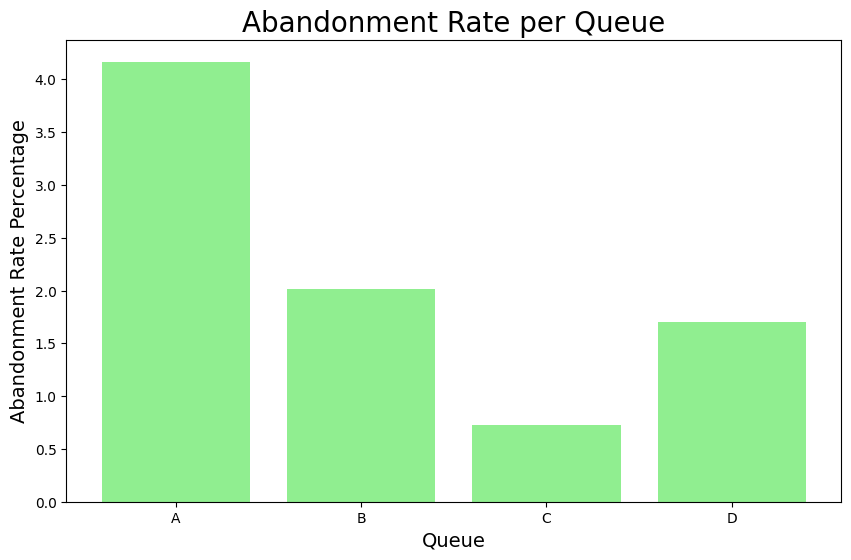

In [643]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i]) * 100
abandonment_rates = list(abandonment_rates.values())

#Your code below:
plt.figure(figsize=(10,6))

plt.bar(queues, abandonment_rates, color="lightgreen")
plt.title("Abandonment Rate per Queue", fontsize= 20)
plt.xlabel("Queue", fontsize=14)
plt.ylabel("Abandonment Rate Percentage", fontsize=14)

plt.show()

##### Record your answer below:

> Chart style you chose and why: I choose to use a Column Chart. This visual distinctly shows the 4 different queues A, B, C, & D with their abandonment rate percentage. I felt like this chart type displayed the data in the simpliest way for the audience to quickly see the total rate per queue.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

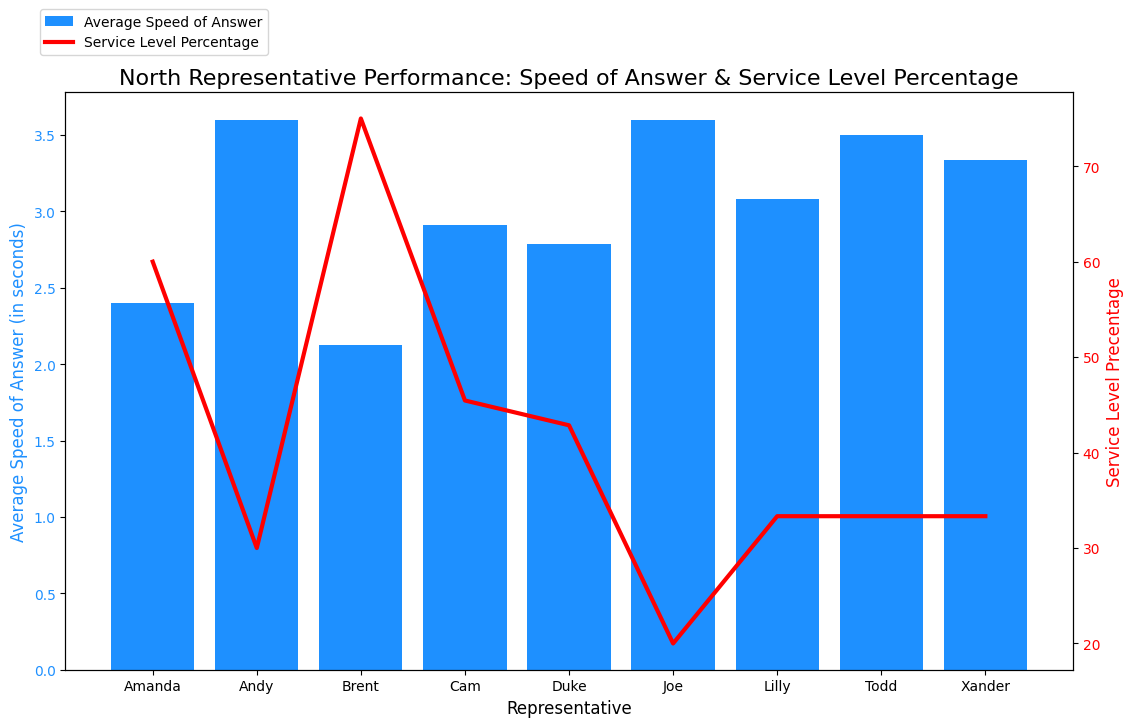

In [644]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()


# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table 


#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
fig, ax1 = plt.subplots(figsize=(13,7.5))

# Bar Chart Info
ax1.bar(north_plt["Rep ID"], north_plt["Incoming Wait Time"], color='dodgerblue', label='Average Speed of Answer')
ax1.set_xlabel('Representative', color='black', fontsize=12)
ax1.set_ylabel('Average Speed of Answer (in seconds)', color='dodgerblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='dodgerblue')

#Shared X-axis
ax2 = ax1.twinx()

#Line Chart Info
ax2.plot(north_plt["Rep ID"], service_level["Service Level %"], color='red', linewidth=3, label='Service Level Percentage')
ax2.set_ylabel('Service Level Precentage', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

#Title & Legend 
plt.title('North Representative Performance: Speed of Answer & Service Level Percentage', fontsize=16)
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 1.0)) 

plt.show()


##### Record your answer below:

> Chart style you chose and why:  I decided to use a dual-axis column and line chart to show both representative performance values. I wanted to have 1 graph to make it simple to see both values instead of creating multiple charts. I feel like having the column graph chart the average speed of answered calls, and the line plot charting the service level percentage, you can look at each representative and see how their performance compares to one another. The higher the line chart the higher their service level that they provide, and this can be correlated to how fast they answer their calls. It appears that those reps with the highest average speed, also have some of the lowest service level percentages. I feel like this chart easily displays all of this information.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

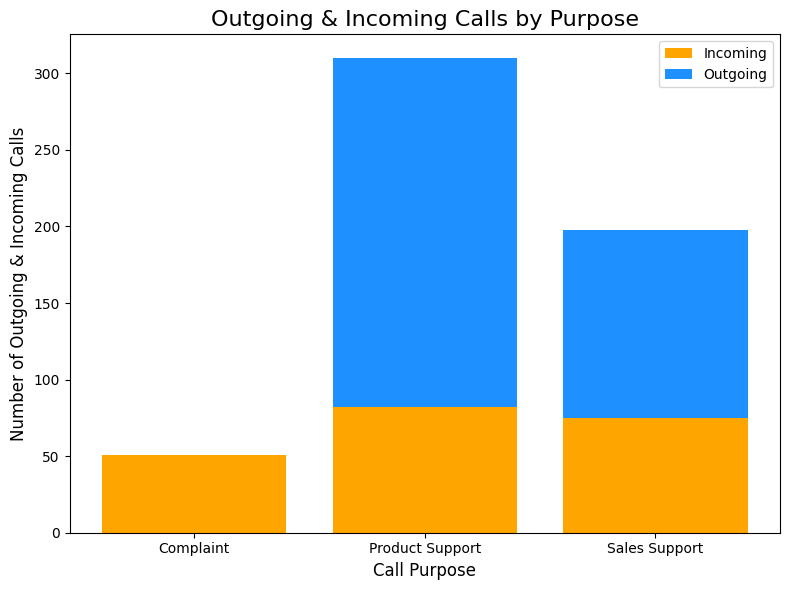

In [645]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Create pivot table
pivot = df.pivot_table(
    index="Call Purpose",
    columns="Incoming or Outgoing",
    values="Calls",  
    aggfunc="count" 
) 
pivot
#Your Code Here:

plt.figure(figsize=(8,6))

#Stacked Layers
plt.bar(pivot.index, pivot["Incoming"], label="Incoming", color="orange")
plt.bar(pivot.index, pivot["Outgoing"], bottom=pivot["Incoming"], label="Outgoing", color="dodgerblue")

plt.title("Outgoing & Incoming Calls by Purpose", color='black', fontsize=16)
plt.xlabel("Call Purpose", color='black', fontsize=12)
plt.ylabel("Number of Outgoing & Incoming Calls", color='black', fontsize=12)
plt.legend() 
plt.tight_layout()
plt.show()


##### Record your answer below:

> Chart style you chose and why: I chose to use a stacked column chart. This chart easily shows each call purpose and breaks the columns up into an Incoming or Outgoing Call count. I felt like the best way to display the Outgoing and Incoming call data was to break the call purposes up into seperate columns, by using the stacked columns you can get a sense of how many total calls there were for each purpose and then you can also see the breakdown between outgoing and incoming. 

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: I feel like the North branch is operating more efficiently although, both branches are not too different from eachother. The South branch does have a lower abandonment rate, which is great but it is not within the optimal range of 2-5% that the company has set. North Branch is slightly higher at 2.86% but this is well within the optimal range. North Branch also has a higher service level at 40.24% as opposed to South branch coming in at around 38%. The average speed of answer is very slightly faster with South Branch but the difference between the 2 branches is only .05%, so this is negligible. The North Branch is also operating with less people 9 representatives vs the South with 11, so this tells me that maybe the South Branch is overstaffed. So for these reasons I do believe the North Branch is operating more efficiently.



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: I do believe based on these numbers that the South Branch is currently overstaffed and that North Branch might benefit from an additional person. North Branch is already operating efficiently, so an added person may help decrease their average answer time and get this number closer to 2 seconds, if this happens their Service Level percentage may increase even more. North Branch also has the most efficient worker, Brent, he answers the most calls and, according to the North Branch Representative graph, he also answers his calls the quickest and has the highest Service Level Precentage. If Brent wasn't at North Branch, I do believe their metrics would not be where they are currently. To make up for the this, I do belive that an additional person would most benefit the North Branch.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: I think it would be interesting to see how many customer issues are resolved within the first call. Since there are both incoming and outgoing calls, this is obviously a sign that there are some issues that take multiple calls to resolve, so it would be intersting to see how many of the total calls are resolved within the first call or took multiple. Product Support has the most outgoing phone calls according to the Outgoing Incoming Calls by Purpose chart, so I wonder if this category often take multiple phone calls to resolve with a customer. I think this would also be an interesting efficiency metric to explore.


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: I chose to use 3 line graphs, one graph per call purpose. Then I plotted a lines for each Incoming and Outgoing Calls. I chose this type because it easliy showed the call counts for each type for each time block. I split them into 3 graphs so the data would be clear and easy to read and understand.

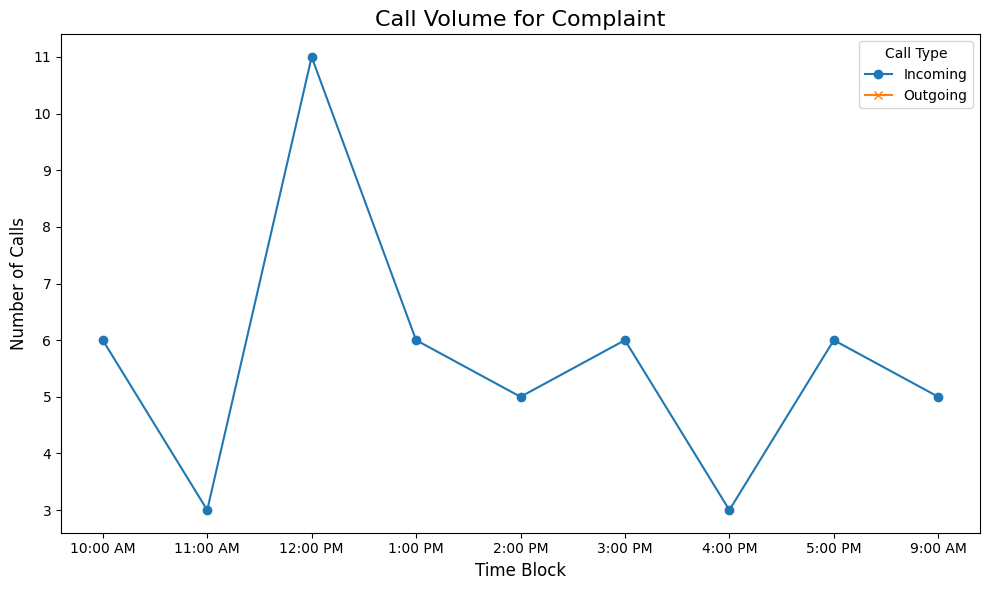

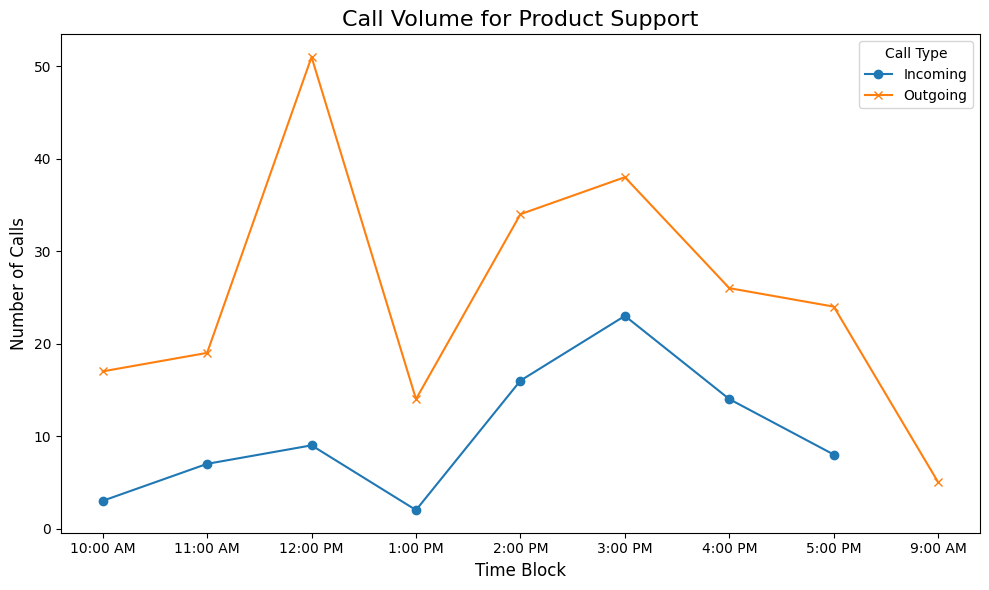

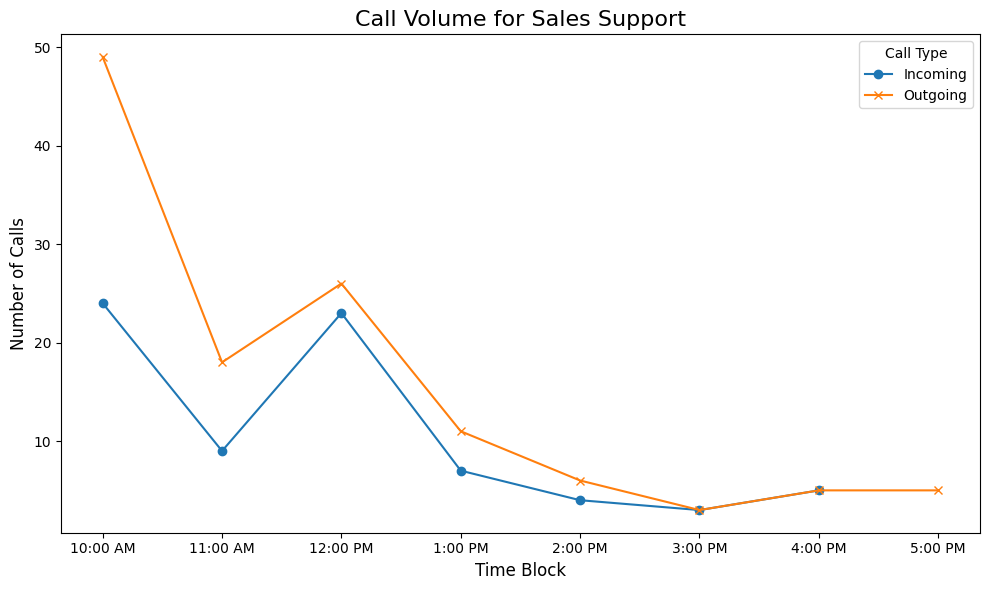

In [646]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:
grouped_calls = call_times.groupby(["Time Block", "Call Purpose", "Incoming or Outgoing"]).sum().reset_index()

incoming_calls = grouped_calls[grouped_calls['Incoming or Outgoing'] == 'Incoming']
outgoing_calls = grouped_calls[grouped_calls['Incoming or Outgoing'] == 'Outgoing']
purposes = grouped_calls['Call Purpose'].unique()

for purpose in purposes:
    plt.figure(figsize=(10, 6))
    plt.plot(incoming_calls[incoming_calls['Call Purpose'] == purpose]['Time Block'], 
             incoming_calls[incoming_calls['Call Purpose'] == purpose]['Calls'], 
             label='Incoming', marker='o')
    plt.plot(outgoing_calls[outgoing_calls['Call Purpose'] == purpose]['Time Block'], 
             outgoing_calls[outgoing_calls['Call Purpose'] == purpose]['Calls'], 
             label='Outgoing', marker='x')
    plt.title(f'Call Volume for {purpose}', color='black', fontsize=16)
    plt.xlabel('Time Block', color='black', fontsize=12)
    plt.ylabel('Number of Calls', color='black', fontsize=12)
    plt.legend(title='Call Type')
    plt.tight_layout()
plt.show()